In [215]:
from matplotlib import pyplot as plt
import requests, pandas as pd, numpy as np
from tensorflow import keras
from tensorflow.keras import models, layers



In [216]:
df = pd.read_csv("eurofxref-hist.csv")

In [217]:
df

,Date,USD,JPY,BGN,CYP,CZK,DKK,EEK,GBP,HUF,...,ILS,INR,KRW,MXN,MYR,NZD,PHP,SGD,THB,ZAR
0,29-11-2022,1.0366,143.36,1.9558,NaN,24.334,7.4367,NaN,0.86218,406.50,...,3.5581,84.6548,1375.70,19.8075,4.6735,1.6639,58.640,1.4237,36.706,17.6027
1,28-11-2022,1.0463,144.90,1.9558,NaN,24.348,7.4367,NaN,0.86606,408.87,...,3.6002,85.4370,1396.56,20.2200,4.6874,1.6827,59.210,1.4375,37.285,17.9376
2,25-11-2022,1.0375,144.62,1.9558,NaN,24.367,7.4365,NaN,0.85885,411.33,...,3.5551,84.7145,1383.20,20.1069,4.6480,1.6651,58.795,1.4277,37.153,17.7677
3,24-11-2022,1.0413,143.90,1.9558,NaN,24.392,7.4369,NaN,0.85933,413.33,...,3.5607,85.0295,1382.28,20.1501,4.6806,1.6598,58.992,1.4319,37.258,17.7246
4,23-11-2022,1.0325,145.75,1.9558,NaN,24.356,7.4370,NaN,0.86369,405.75,...,3.5681,84.4660,1397.42,20.0010,4.7237,1.6718,58.914,1.4295,37.423,17.7103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6120,08-01-1999,1.1659,130.09,NaN,0.58187,34.938,7.4433,15.6466,0.70940,250.15,...,NaN,NaN,1366.73,NaN,NaN,2.1557,NaN,1.9537,NaN,6.7855
6121,07-01-1999,1.1632,129.43,NaN,0.58187,34.886,7.4431,15.6466,0.70585,250.09,...,NaN,NaN,1337.16,NaN,NaN,2.1531,NaN,1.9436,NaN,6.8283
6122,06-01-1999,1.1743,131.42,NaN,0.58200,34.850,7.4452,15.6466,0.70760,250.67,...,NaN,NaN,1359.54,NaN,NaN,2.1890,NaN,1.9699,NaN,6.7307
6123,05-01-1999,1.1790,130.96,NaN,0.58230,34.917,7.4495,15.6466,0.71220,250.80,...,NaN,NaN,1373.01,NaN,NaN,2.2011,NaN,1.9655,NaN,6.7975


In [218]:
df1 = df.drop(['CYP','EEK','LTL','LVL','MTL','ROL','SIT','SKK','RUB','TRL', 'BRL', 'JPY','BGN','CZK', 'DKK', 'EEK',
                  'GBP','HUF','ILS','INR','KRW','MXN','MYR','NZD','PHP','SGD', 'THB', 'ZAR','PLN','RON','SEK','CHF','ISK',
                   'NOK','HRK','TRY', 'AUD','CAD','CNY','HKD','IDR'], axis=1)

In [219]:
df1.to_csv('usd_eur.csv', index =False)

In [220]:
usd_eur = pd.read_csv('usd_eur.csv', sep = ',')

In [239]:
usd_eur. tail(5)

,Date,USD
6120,08-01-1999,1.1659
6121,07-01-1999,1.1632
6122,06-01-1999,1.1743
6123,05-01-1999,1.1790
6124,04-01-1999,1.1789


In [222]:
Y=usd_eur.USD

In [223]:
X = np.arange(Y.shape[0]).reshape(-1,1)

In [225]:
sequence_length = 14
delay = 14
batch_size = 256

In [226]:
num_train_samples = int(0.85*usd_eur.shape[-0])
num_val_samples=usd_eur.shape[0] - num_train_samples
print('num_train_samples:', num_train_samples)
print('num_val_samples:', num_val_samples)

num_train_samples: 5206
num_val_samples: 919


In [227]:
X

array([[   0],
       [   1],
       [   2],
       ...,
       [6122],
       [6123],
       [6124]])

In [228]:
train_dataset = keras.utils.timeseries_dataset_from_array(
    Y[:-delay],
    targets=Y[delay:],
    sequence_length=sequence_length,
    shuffle=False,
    batch_size=batch_size,
    start_index=0,
    end_index=num_train_samples)

val_dataset = keras.utils.timeseries_dataset_from_array(
    Y[:-delay],
    targets=Y[delay:],
    sequence_length=sequence_length,
    shuffle=False,
    batch_size=batch_size,
    start_index=num_train_samples)

In [229]:
for samples, targets in train_dataset:
    print("samples shape:", samples.shape)
    print("targets shape:", targets.shape)
    break

samples shape: (256, 14)
targets shape: (256,)


In [230]:
samples.shape

TensorShape([256, 14])

In [231]:
samples[0]

<tf.Tensor: shape=(14,), dtype=float64, numpy=
array([1.0366, 1.0463, 1.0375, 1.0413, 1.0325, 1.0274, 1.0246, 1.0366,
       1.0319, 1.0412, 1.0404, 1.0319, 1.0308, 0.9954])>

In [232]:
targets

<tf.Tensor: shape=(256,), dtype=float64, numpy=
array([1.0039, 0.9996, 0.9993, 0.9872, 0.9753, 0.9908, 0.9947, 0.9914,
       0.9951, 1.0037, 1.0023, 0.9861, 0.9851, 0.973 , 0.9811, 0.9778,
       0.9835, 0.9739, 0.9717, 0.9739, 0.9706, 0.9723, 0.9697, 0.9797,
       0.986 , 0.9915, 0.9891, 0.9764, 0.9748, 0.9706, 0.9565, 0.9644,
       0.9646, 0.9754, 0.9884, 0.9906, 0.9986, 0.999 , 0.9954, 0.9992,
       0.999 , 1.0175, 1.0155, 1.0049, 1.0009, 0.9885, 0.9928, 0.992 ,
       0.9993, 1.0004, 1.    , 1.0034, 0.9986, 1.0007, 0.997 , 0.9934,
       0.9927, 1.0001, 1.0054, 1.0178, 1.0164, 1.0131, 1.0195, 1.0285,
       1.0338, 1.0252, 1.0234, 1.0199, 1.0233, 1.0181, 1.0194, 1.0224,
       1.0233, 1.0198, 1.0122, 1.0152, 1.0124, 1.0236, 1.019 , 1.0199,
       1.0199, 1.0245, 1.0131, 1.0059, 1.0005, 1.0067, 1.0042, 1.0098,
       1.0163, 1.018 , 1.0177, 1.029 , 1.0455, 1.0425, 1.0387, 1.0517,
       1.0561, 1.0572, 1.0524, 1.0493, 1.0521, 1.055 , 1.0517, 1.0486,
       1.04  , 1.0431, 1.0452

In [233]:
inputs = keras.Input(shape =(sequence_length,X.shape[-1]))
x = layers.LSTM(32, return_sequences = True)(inputs)
x = layers.LSTM(32,)(x)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)
callbacks = [keras.callbacks.ModelCheckpoint("usd_eur.forecast", save_best_only=True)]
model.compile(optimizer="rmsprop", loss = 'mse', metrics=['mae'])

In [235]:
history = model.fit(train_dataset,
                   epochs = 20,
                   validation_data = val_dataset,
                   callbacks=callbacks)

Epoch 1/20
19/21 [==========================>...] - ETA: 0s - loss: 0.0079 - mae: 0.0637

INFO:tensorflow:Assets written to: usd_eur.forecast\assets


INFO:tensorflow:Assets written to: usd_eur.forecast\assets


21/21 [==============================] - 19s 945ms/step - loss: 0.0074 - mae: 0.0611 - val_loss: 6.7729e-04 - val_mae: 0.0207
Epoch 2/20
20/21 [===========================>..] - ETA: 0s - loss: 0.0070 - mae: 0.0614

INFO:tensorflow:Assets written to: usd_eur.forecast\assets


INFO:tensorflow:Assets written to: usd_eur.forecast\assets


21/21 [==============================] - 18s 909ms/step - loss: 0.0069 - mae: 0.0608 - val_loss: 6.7521e-04 - val_mae: 0.0211
Epoch 3/20
21/21 [==============================] - 1s 40ms/step - loss: 0.0060 - mae: 0.0572 - val_loss: 6.9868e-04 - val_mae: 0.0216
Epoch 4/20
21/21 [==============================] - 1s 37ms/step - loss: 0.0056 - mae: 0.0552 - val_loss: 7.2312e-04 - val_mae: 0.0220
Epoch 5/20
21/21 [==============================] - 1s 39ms/step - loss: 0.0052 - mae: 0.0534 - val_loss: 7.4267e-04 - val_mae: 0.0223
Epoch 6/20
21/21 [==============================] - 1s 37ms/step - loss: 0.0049 - mae: 0.0521 - val_loss: 7.5847e-04 - val_mae: 0.0226
Epoch 7/20
21/21 [==============================] - 1s 37ms/step - loss: 0.0048 - mae: 0.0513 - val_loss: 7.7424e-04 - val_mae: 0.0228
Epoch 8/20
21/21 [==============================] - 1s 39ms/step - loss: 0.0045 - mae: 0.0501 - val_loss: 7.8356e-04 - val_mae: 0.0229
Epoch 9/20
21/21 [==============================] - 1s 40ms/step

In [236]:
pred = model.predict(val_dataset)

4/4 [==============================] - 1s 25ms/step


In [237]:
pred.shape

(892, 1)

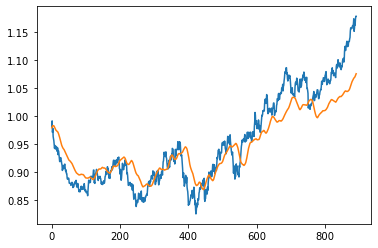

In [238]:
plt.plot(range(892),Y[-892:])
plt.plot(range(892),pred)